### 2021 Spring "EE479: Scientific Computing & Data"

#### Hyeonwoo Yeo (KAIST EE Yong-Hoon Kim Group) 

#### Kutz 9.6: Optimizing Computational Performance: Rules of Thumb

#### Heat equation

###### 2021. 05. 17 Revised from Kutz 9.6

###### To solve: One-way wave equation

(9.6.1b): $\frac{ \partial{u}}{ \partial{t}} = \frac{ \partial^2{u}}{ \partial{x^2}}$


##### General Algorithm:

For the second-derivative matrix,

(9.6.3):$\frac{ \partial^2{u}}{ \partial{x^2}} \rightarrow \frac{1}{\Delta x^2}$ $\left[\begin{array}{rrr} 
-2&1&0&\cdots&0&1\\
1&-2&1&0&\cdots&0\\
0&\ddots&\ddots&\ddots\\
\vdots& & & & &\vdots\\
\vdots&\cdots&0&1&-2&1\\
1&0&\cdots&0&1&-2\\
\end{array}\right]$
$\left(\begin{array}{rrr} 
u_1\\
u_2\\
\vdots\\
u_n\\
\end{array}\right)$

Euler (stable for $\lambda \le 1/2$) (9.6.5a): $ u^{(m+1)}_{n} = u^{(m)}_{n}+\lambda(u^{(m)}_{n+1}-2u^{(m)}_{n}+u^{(m)}_{n-1}) $ 

leap-frog (2,2) (unstable) (9.6.5b): $ u^{(m+1)}_{n} = u^{(m-1)}_{n}+2\lambda(u^{(m)}_{n+1}-2u^{(m)}_{n}+u^{(m)}_{n-1}) $

CFL = $ \lambda = \Delta t/\Delta x^2  $


Analytic general solution 


(9.4.8) leap-frog: $g - \frac{1}{g} = 2\lambda (i sin(\zeta h) -1) \rightarrow |g(\zeta)| \ge 1$ for all $\lambda $, unstable scheme 


(9.4.11 & 12) Euler: $|g(\zeta)| = 1 - 2\lambda + \lambda^2(1+sin^2 \zeta h) \le 1$ for $\lambda \le \frac{1}{2} $, conditionally stable




CFL = 0.49999999999999994
[[-0.66666667  0.66666667  0.         ...  0.          0.
   0.        ]
 [ 1.         -2.          1.         ...  0.          0.
   0.        ]
 [ 0.          1.         -2.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... -2.          1.
   0.        ]
 [ 0.          0.          0.         ...  1.         -2.
   1.        ]
 [ 0.          0.          0.         ...  0.          0.66666667
  -0.66666667]]


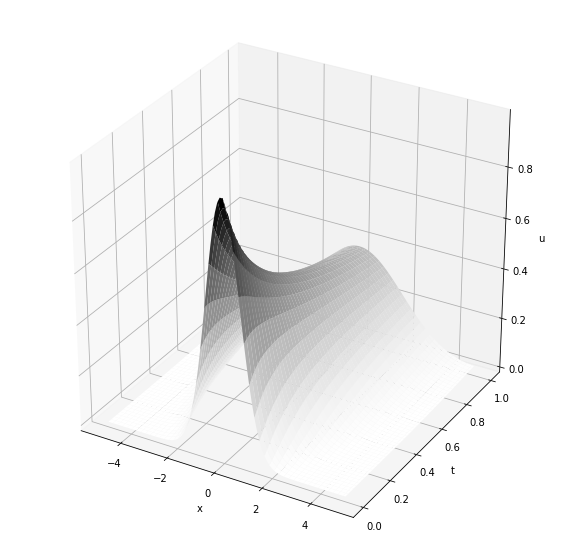

In [2]:
import numpy as np
import numpy.linalg as lin
from matplotlib import pyplot as plt
from scipy.sparse import spdiags, csr_matrix, lil_matrix
import time

# initialize grid size, time, and CFL number
Time=1.5
L=10
n=100
x2=np.linspace(-L/2,L/2,n)
dx=L/n
dt=0.005  # CFL = 0.5
#dt = 0.01   # CFL = 1
CFL=dt/dx/dx
print('CFL =' ,CFL)
time_steps=Time/dt
t=np.linspace(0,int(Time),int(time_steps))

x = []
for i in range(len(x2)):
    x.append(x2[i])
#    x.append(x2[i]+5)          #For boundary check
    
sol = []
u0 = np.exp(-np.square(x))
u1 = np.exp(-np.square(np.array(x)+dt))

sol.append(u0)
sol.append(u1)

################## sparse matrix #####################
a = np.ones(n)
b = np.ones(n)
c = np.ones(n)
c = c.dot(-2)

data = np.array([a,c,b])
diags = np.array([-1,0,1])
d2dx2 = spdiags(data, diags, n, n)
d2dx2 = csr_matrix(d2dx2)
  
#d2dx2[0,n-1] = 1; d2dx2[n-1,0] = 1           #Periodic boundary

d2dx2[0,0]=-2/3; d2dx2[0,1]=2/3             #Neumann boundary
d2dx2[n-1,n-1] = -2/3; d2dx2[n-1,n-2]=2/3

#d2dx2[0,n-1] = 0; d2dx2[n-1,0] = 0          #Dirichelet boundary

print(d2dx2.toarray())
#######################################################

# leap frog (2,2) or euler iteration scheme
for j in range(1, int(time_steps-1)):    
    u2 = u1 + CFL*d2dx2.dot(u1)          #euler
    u1 = u2                              #euler

#    u2 = u0 + 2*CFL*d2dx2.dot(u1)        #leap frog (2,2)
#    u0 = u1                              #leap frog (2,2)
#    u1 = u2                              #leap frog (2,2)
    
    sol.append(u2)

from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

sol = np.array(sol)
A = np.reshape(sol,(int(time_steps),len(x)))

X,T = np.meshgrid(x,t)

surf = ax.plot_surface(X, T, A, cmap='Greys')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')

plt.show()
